# Bifurcation Analysis

In [1]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd
import os

/home/vincent/miniconda3/lib/python3.10/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [2]:
# Load data from numpy files
autoregressive_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/AutoRegressive_x.npy', allow_pickle=True)
fft_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/combined_fft_psd_x.npy', allow_pickle=True)
lomb_scargle_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/LombScarglePeriodograms_x.npy', allow_pickle=True)
peak_frequencies_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/PeakFrequencies_x.npy', allow_pickle=True)
freqbands_welchs_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/welchs_x.npy', allow_pickle=True)
spectral_centroids_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralCentroids_x.npy', allow_pickle=True)
spectral_edge_densities_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEdgeDensities_x.npy', allow_pickle=True)
spectral_entropy_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEntropy_x.npy', allow_pickle=True)
stft_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/STFT_x.npy', allow_pickle=True)
welchs_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/psd_x.npy', allow_pickle=True)
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

In [3]:
# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

In [ ]:
Graph Theory Analysis

In [ ]:
 the current source density,  LORETA or  

# Dipole

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished


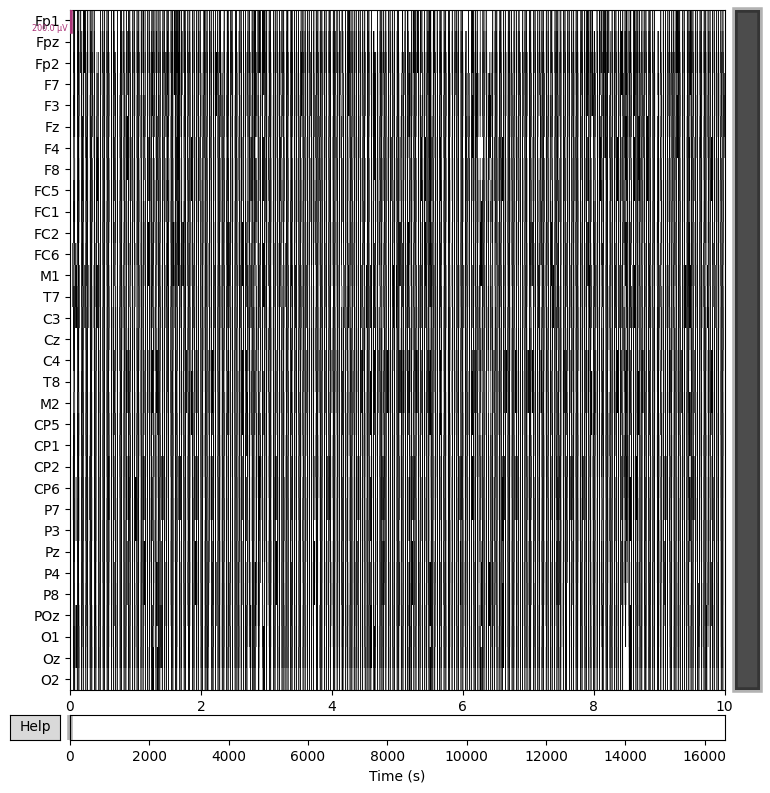

Creating RawArray with float64 data, n_channels=32, n_times=4227788
    Range : 0 ... 4227787 =      0.000 ...  4227.787 secs
Ready.


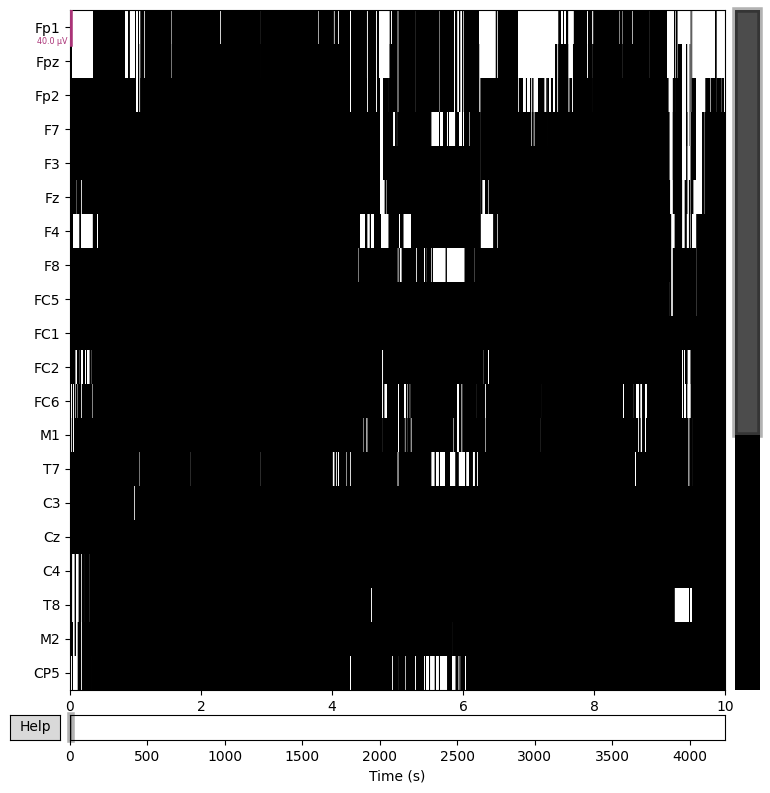

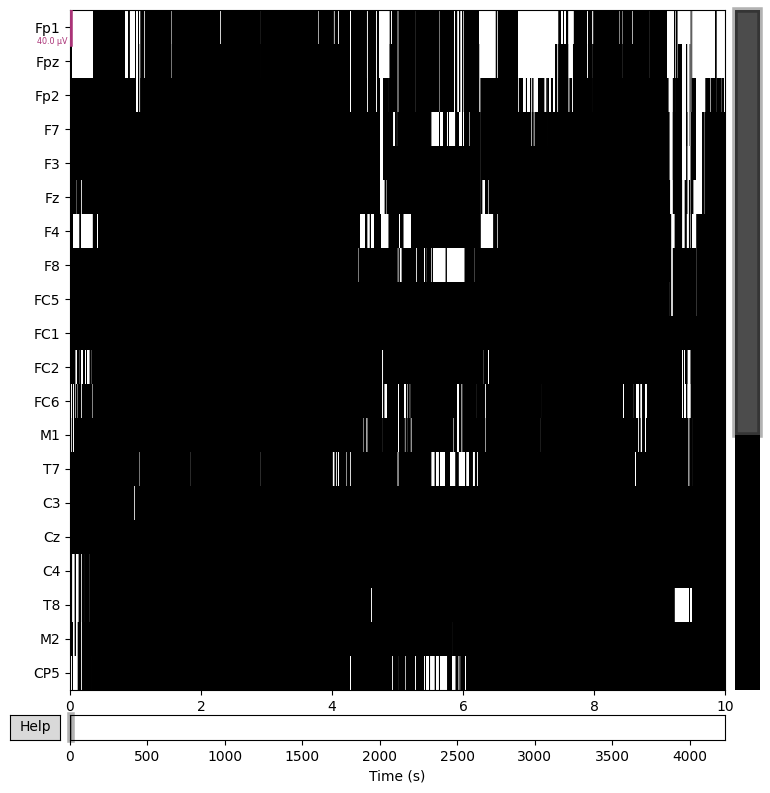

In [14]:
import numpy as np
import mne

# 1. Load the data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Assuming EEG_data is of shape (n_times, n_channels), if not, transpose it
if EEG_data.shape[0] > EEG_data.shape[1]:
    EEG_data = EEG_data.T

# 2. Create an MNE raw object
# Define some standard channel names for the 10-20 system.
# Adjust the list to match your data's channels (this list contains 32 channels as you mentioned before)
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Apply band-pass filter to remove common artifacts (this step is optional but can help if artifacts are present)
raw.filter(1, 40)  # 1Hz to 40Hz filter

# Plot the raw data with adjusted scaling
scalings = {'eeg': 100e-6}  # 100 µV per division
raw.plot(scalings=scalings, n_channels=len(raw.ch_names), show=True, title="EEG Data")

# Assuming a common EEG sampling frequency (e.g., 256 Hz), adjust as necessary
sfreq = 1000
info = mne.create_info(ch_names=eeg_channels, sfreq=sfreq, ch_types='eeg')

raw = mne.io.RawArray(EEG_data, info)

# 3. Set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Display the raw data
raw.plot()


# sLORETA

In [7]:
import mne
import numpy as np

# Set up subjects_dir before calling the make_watershed_bem function
subjects_dir = str(mne.datasets.sample.data_path()) + '/subjects'

# Create the BEM surfaces
mne.bem.make_watershed_bem(subject='fsaverage', subjects_dir=subjects_dir, overwrite=True, volume='T1', atlas=True, gcaatlas=True, preflood=None)

# Set up source space, BEM, and forward solution
src = mne.setup_source_space("fsaverage", spacing="ico4", subjects_dir=subjects_dir)
model = mne.make_bem_model(subject='fsaverage', ico=4, subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Iterate through each EEG data dictionary
for data_dict in EEG_data:
    # Extract channels and sampling rate from the dictionary
    channels = data_dict['channels']
    sampling_rate = data_dict['sampling_rate']

    # Create MNE Raw object
    info = mne.create_info(ch_names=channels, sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data_dict['data'], info)

    # Filter the data (optional)
    raw.filter(l_freq=1, h_freq=40)
    
    # Make the forward solution. This can be outside the loop if all data share the same channel configuration.
    fwd = mne.make_forward_solution(raw.info, trans=None, src=src, bem=bem, eeg=True, mindist=5.0, n_jobs=1)

    # Compute covariance matrix and apply inverse operator
    cov = mne.compute_covariance(raw, tmax=0.)
    inv = mne.minimum_norm.make_inverse_operator(raw.info, fwd, cov, loose=0.2, depth=0.8)

    # sLORETA estimation
    stc = mne.minimum_norm.apply_inverse_raw(raw, inv, lambda2=1./9., method='sLORETA')

    # Save sLORETA results
    result_filename = 'sLORETA_' + data_dict['subject'] + '.stc'  # Modify the filename as needed
    result_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Bifurcation Analysis/' + result_filename  # Specify the desired directory path
    stc.save(result_path)

print("sLORETA results saved for each EEG data.")

RuntimeError: The FREESURFER_HOME environment variable is not set.

In [4]:
# Plotting the source estimates
brain = stc.plot(subject='fsaverage', subjects_dir=mne.datasets.sample.data_path() + '/subjects', surface='inflated')

NameError: name 'stc' is not defined

In [5]:
ts = stc.data[0, :]

import PyDSTool as dst
import matplotlib.pyplot as plt

# Define system (as an example)
DSargs = dst.args(name='DynamicSystem')
DSargs.pars = {'a': -0.5, 'b': -0.6}  # example parameters
DSargs.tdata = [0, stc.times[-1]]
DSargs.varspecs = {'x': 'y*(1-x**2) + a*(1-y**2)*x - b*(x**2)*y'}
DSargs.ics = {'x': ts[0]}  # initial condition

DS = dst.Vode_ODEsystem(DSargs)
traj = DS.compute('trajectory')
pts = traj.sample()

# Plotting bifurcation (hypothetical, may need adjustments)
plt.plot(stc.times, pts['x'])
plt.show()

NameError: name 'stc' is not defined

In [ ]:
# Initialize a PyCoBi object
pcb = pycobi()

pcb.load_equations('put model here.f')

# Set the initial conditions and parameters for your system
pcb.set_initial_conditions([V_init, 0.05, 0.6, 0.32])

# Define your control parameter and its range for the continuation
pcb.set_control_parameter('I', start=0, stop=100, step=1)

# Run the continuation
pcb.run_continuation()

# Display the bifurcation diagram
pcb.plot_bifurcation_diagram()

In [ ]:
Dynamic Causal Modeling

In [ ]:
Model-Based Mapping

In [ ]:
Jansen-Rit model

In [ ]:
import PyDSTool as dst
from PyDSTool import args

# Set up the parameters
par_args = {'Cm': 1.0 * 10**-6, 'g_Na': 120.0 * 10**-3, 'g_K': 36.0 * 10**-3, 
            'g_L': 0.3 * 10**-3, 'E_Na': 50.0, 'E_K': -77.0, 'E_L': -54.387,
            'I': 10 * 10**-6}

# Set up the initial conditions
ic_args = {'V': -65, 'm': 0.05, 'h': 0.6, 'n': 0.32}

# Set up the differential equations
varspecs = {"V": "(I - g_Na*m**3*h*(V - E_Na) - g_K*n**4*(V - E_K) - g_L*(V - E_L)) / Cm",
            "m": "alpha_m*(1.0-m) - beta_m*m",
            "h": "alpha_h*(1.0-h) - beta_h*h",
            "n": "alpha_n*(1.0-n) - beta_n*n"}

# Set up the auxiliary functions
fnspecs = {"alpha_m": (['V'], "0.1*(V+40.0)/(1.0 - exp(-(V+40.0) / 10.0))"),
            "beta_m": (['V'], "4.0*exp(-(V+65.0) / 18.0)"),
            "alpha_h": (['V'], "0.07*exp(-(V+65.0) / 20.0)"),
            "beta_h": (['V'], "1.0/(1.0 + exp(-(V+35.0) / 10.0))"),
            "alpha_n": (['V'], "0.01*(V+55.0)/(1.0 - exp(-(V+55.0) / 10.0))"),
            "beta_n": (['V'], "0.125*exp(-(V+65) / 80.0)")}

# Set up the system
HH = dst.Vode_ODEsystem(dst.args(name='HH', pars=par_args, varspecs=varspecs, 
                                 ics=ic_args, fnspecs=fnspecs))

# Set up the bifurcation analysis
PC = dst.ContClass(HH)

# Define the bifurcation parameter and range
PCargs = dst.args(name='PCargs', type='EP-C', independentvarname='I',
                  MaxNumPoints=1000, MaxStepSize=0.1, MinStepSize=1e-5, 
                  StepSize=2e-2, LocBifPoints='all', SaveEigen=True)
PCargs.freepars = ['I']
PCargs.MaxNumPoints = 500

# Perform the bifurcation analysis
PC.newCurve(PCargs)
PC.curves['PCargs'].forward()

# Plot the bifurcation diagram
PC.display(('I', 'V'), stability=True, figure=1)

In [ ]:
import PyDSTool as dst
import numpy as np
import matplotlib.pyplot as plt

# Define the EEG model
def eeg_model(x, t, p):
    # Define the equations that govern the dynamics of the EEG model
    # Modify these equations to fit your specific model
    dx = x[0] * (p['a'] - x[0]) * (x[0] - 1) - x[1]
    dy = p['c'] * (x[0] - p['b'] * x[1])
    return np.array([dx, dy])

# Set the parameter ranges and values for bifurcation analysis
# Modify these parameter ranges and values to fit your specific model
pars = {
    'a': 0,  # Value for parameter a
    'b': 0,  # Value for parameter b
    'c': 0   # Value for parameter c
}

# Define the PyDSTool model
DSargs = dst.args()
DSargs.name = 'EEG'
DSargs.varspecs = {
    'x': 'x * (a - x) * (x - 1) - y',
    'y': 'c * (x - b * y)',
}
DSargs.pars = pars
DSargs.tdata = [0, time[-1]]  # Time domain for simulation
DSargs.algparams = {'max_pts': 10000, 'maxevtpts': 1000}

# Create a PyDSTool Generator for bifurcation analysis
generator = dst.Generator.Vode_ODEsystem(DSargs)

# Create a PyDSTool Continuation class for bifurcation analysis
PC = dst.ContClass(generator)

# Set up the bifurcation diagram specifications
PCargs = dst.args(name='EQ1', type='EP-C', freepars=['a'], MaxNumPoints=200, MaxStepSize=0.1)
PC.newCurve(PCargs)

# Generate the bifurcation diagram
PC['EQ1'].forward()

# Plot the bifurcation diagram
plt.figure(figsize=(8, 6))
PC.display(('a', 'x'))
plt.xlabel('Parameter a')
plt.ylabel('EEG State Variable x')
plt.title('Bifurcation Diagram for EEG Model')
plt.grid(True)
plt.show()

In [ ]:
# Define the differential equations
def vanderpol_rhs(x, y, mu):
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return (dxdt, dydt)

# Parameters for the Van der Pol oscillator
mu = 2.0

# Define the PyDSTool model
DSargs = dst.args(name='vanderpol')
DSargs.pars = {'mu': mu}
DSargs.varspecs = {'x': 'y', 'y': 'mu * (1 - x**2) * y - x'}
DSargs.ics = {'x': 1, 'y': 1}
DSargs.tdomain = [0, 100]

ode = dst.Generator.Vode_ODEsystem(DSargs)

# Bifurcation analysis
PC = dst.ContClass(ode)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['mu']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 1e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 40
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

PC.display(['mu'], stability=True, linewidth=2)
plt.xlabel('mu')
plt.ylabel('x')
plt.title('Bifurcation Diagram')
plt.grid()
plt.show()